In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('adult_with_headers.csv')

In [4]:
data.shape

(32561, 15)

In [5]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data.sample(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
11063,21,Private,350001,Some-college,10,Never-married,Farming-fishing,Own-child,White,Male,0,0,20,United-States,<=50K
5478,51,Private,254211,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,20,United-States,>50K
3254,49,Self-emp-not-inc,211762,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
24401,60,Self-emp-not-inc,176839,Prof-school,15,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,>50K
9037,22,Private,161532,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,35,United-States,<=50K


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
data.duplicated().any()

np.True_

In [9]:
data[data.duplicated()==True].shape

(24, 15)

In [10]:
data=data.drop_duplicates()
data.shape

(32537, 15)

In [12]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [14]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [19]:
data.describe(include='O')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32537,32537,32537,32537,32537,32537,32537,32537,32537
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


In [24]:
# Categorical columns
col_cat = []

for col in data.columns:
    if data[col].dtype == 'O':
        col_cat.append(col)
print(col_cat)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [25]:
data1 = data[col_cat]
data1.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [23]:
# NUMERICAL COLUMNS
col_num = []

for col in data.columns:
    if data[col].dtype != 'O':
        col_num.append(col)
print(col_num)

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [17]:
data2=data[col_num]
data2.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [21]:
import seaborn as sns

<Axes: >

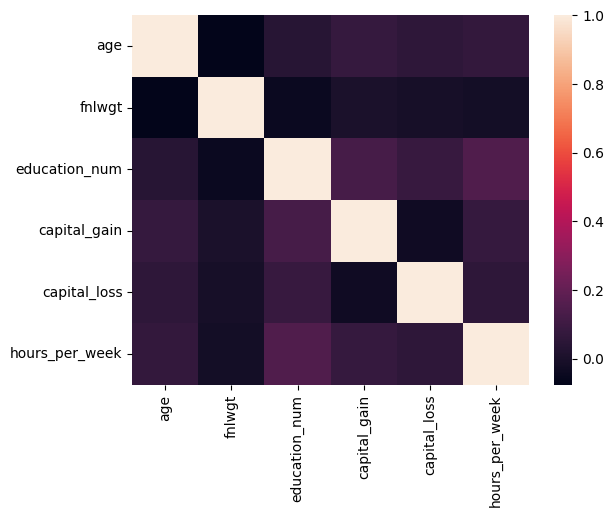

In [22]:
sns.heatmap(data1.corr())

In [ ]:
 capital_gain  ~ capital_gain
hours_per_week ~  capital_gain

## EDA

In [ ]:
# Univariate Analysis

# Analysis of Categorical column

In [28]:
for col in col_cat:
  print(data[col].value_counts(),'\n')

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64 

education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64 

marital_status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64 

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial

<Axes: xlabel='workclass'>

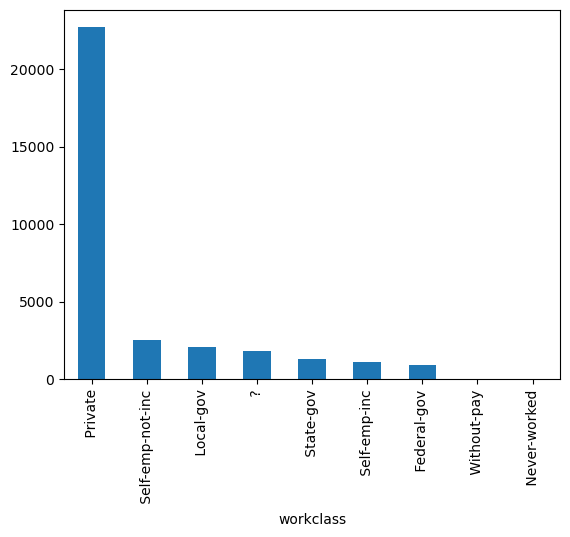

In [ ]:
data1['workclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

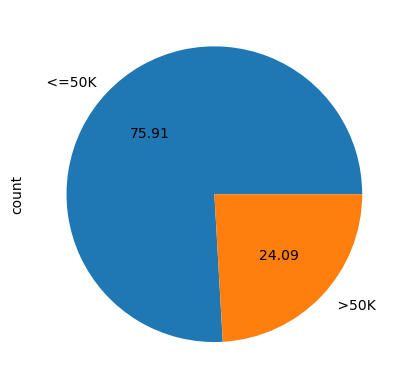

In [ ]:
data1['income'].value_counts().plot(kind='pie',autopct='%.2f')

In [ ]:
import seaborn as sns

# Analysis of Numerical Column

In [29]:
col_num

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

(array([5562., 5884., 6046., 6158., 3965., 2591., 1595.,  496.,  174.,
          66.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

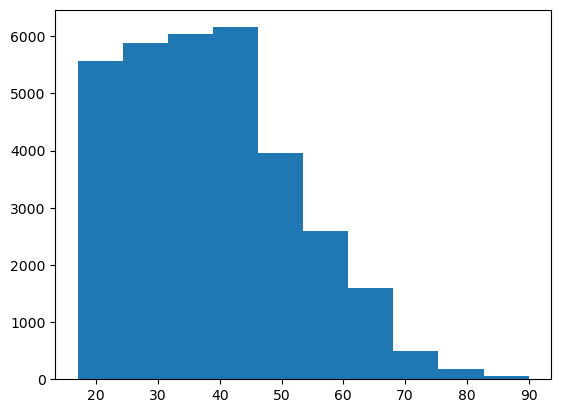

In [ ]:
plt.hist(data1['age'])                                # Left skewed

(array([1.3107e+04, 1.5316e+04, 3.4950e+03, 4.7700e+02, 1.0200e+02,
        2.0000e+01, 1.0000e+01, 5.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([  12285.,  159527.,  306769.,  454011.,  601253.,  748495.,
         895737., 1042979., 1190221., 1337463., 1484705.]),
 <BarContainer object of 10 artists>)

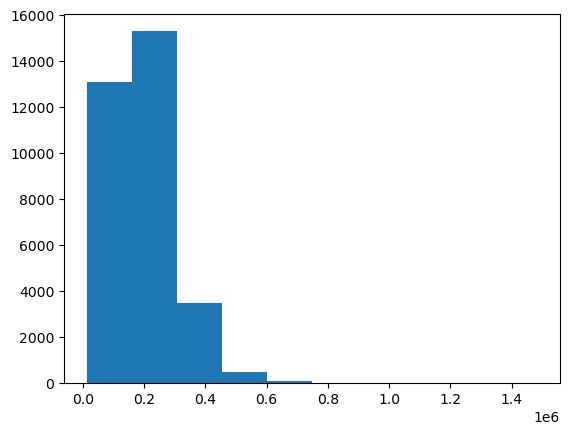

In [ ]:
plt.hist(data1['fnlwgt'])                                                    # Left skewed

(array([  216.,   332.,  1159.,   933.,  1608., 10494.,  8664.,  1067.,
         7075.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

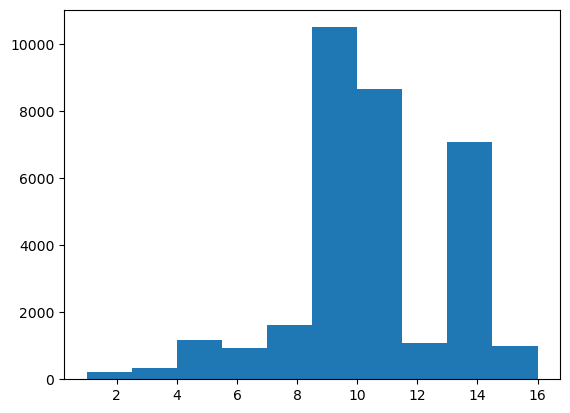

In [ ]:
plt.hist(data1['education_num'])

(array([3.1767e+04, 5.1700e+02, 8.7000e+01, 5.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5900e+02]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <BarContainer object of 10 artists>)

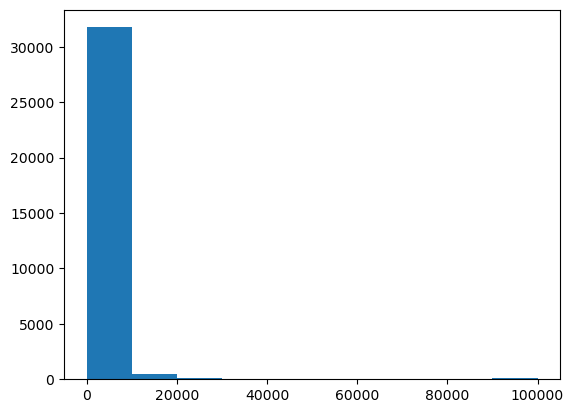

In [ ]:
plt.hist(data1['capital_gain'])

(array([3.1029e+04, 1.7000e+01, 2.1000e+01, 4.6100e+02, 7.7900e+02,
        2.0700e+02, 1.4000e+01, 0.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([   0. ,  435.6,  871.2, 1306.8, 1742.4, 2178. , 2613.6, 3049.2,
        3484.8, 3920.4, 4356. ]),
 <BarContainer object of 10 artists>)

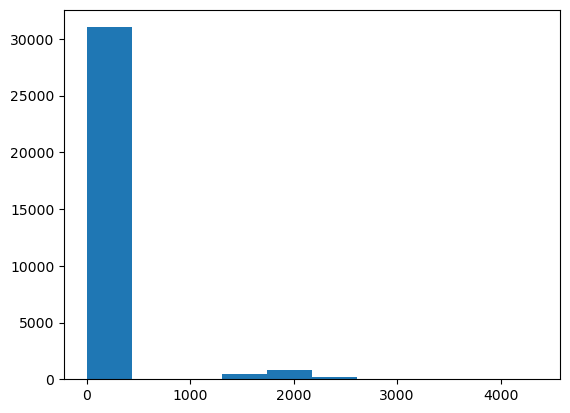

In [ ]:
plt.hist(data1['capital_loss'])

(array([  733.,  2191.,  2316., 17721.,  3117.,  3874.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

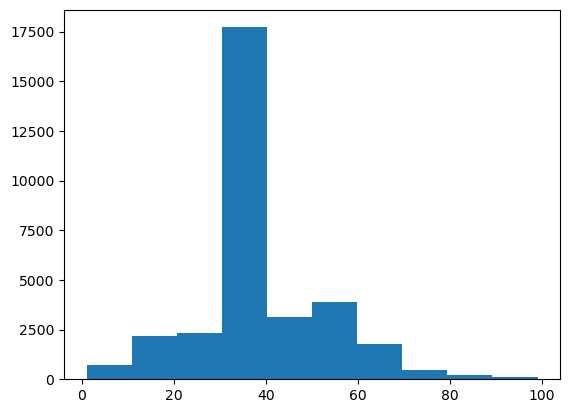

In [ ]:
plt.hist(data1['hours_per_week'])

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

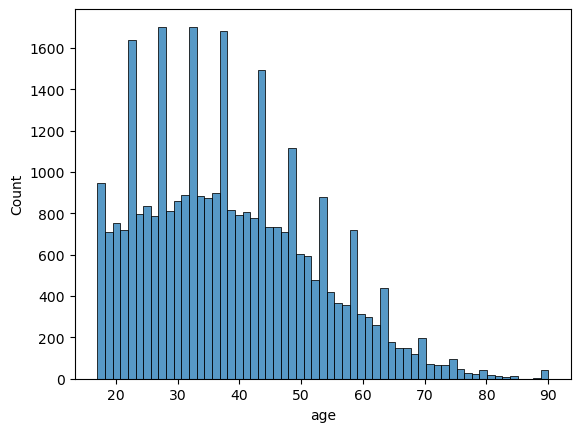

In [ ]:
sns.histplot(data1['age'])

<Axes: >

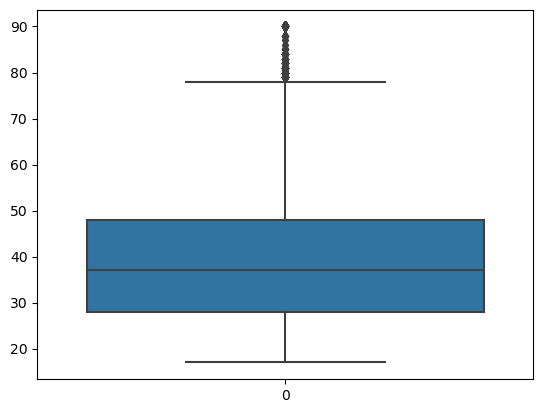

In [ ]:
sns.boxplot(data1['age'])

<Axes: >

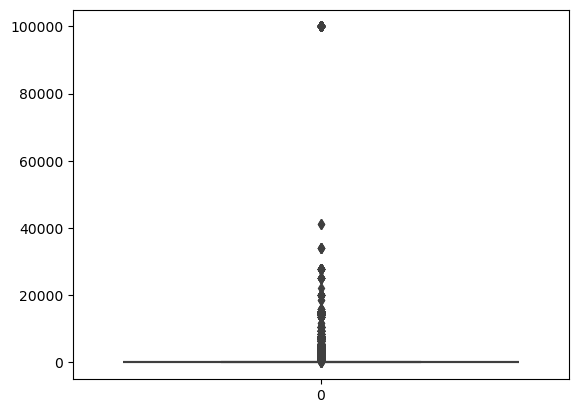

In [ ]:
sns.boxplot(data1['capital_gain'])

<Axes: >

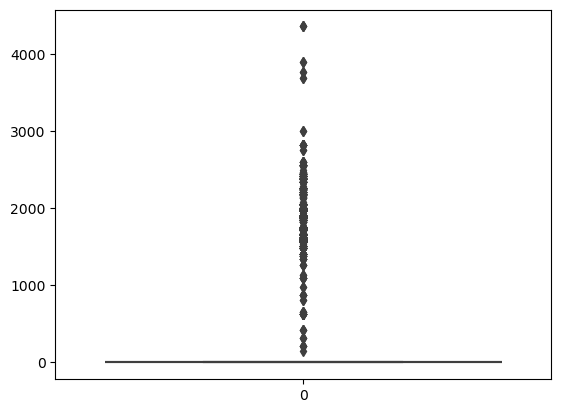

In [ ]:
sns.boxplot(data1['capital_loss'])

<Axes: >

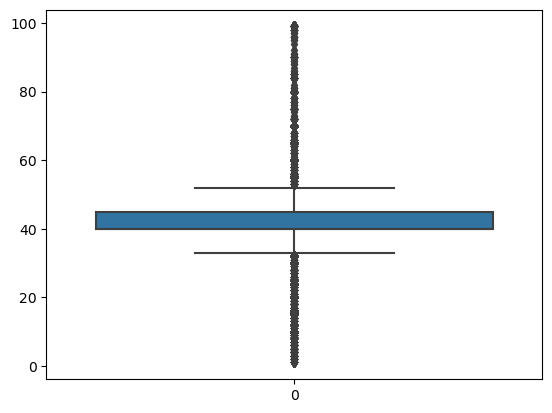

In [ ]:
sns.boxplot(data1['hours_per_week'])

In [ ]:
# Bivariate Analysis

<BarContainer object of 32537 artists>

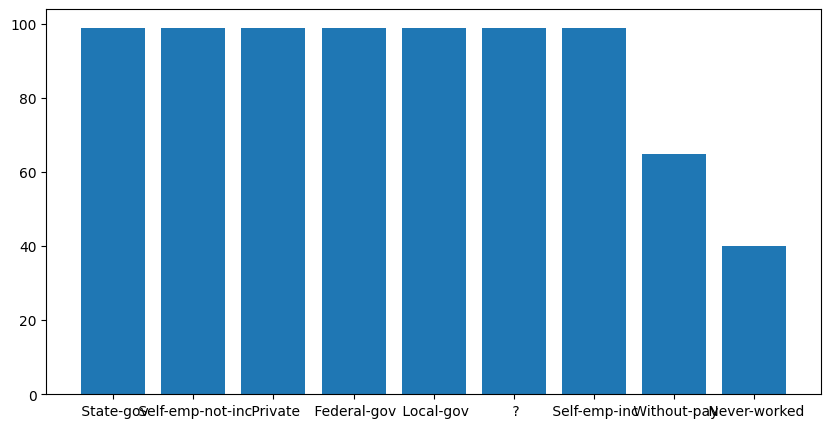

In [43]:
plt.figure(figsize=(10, 5))
plt.bar(data['workclass'],data['hours_per_week'])

<Axes: xlabel='hours_per_week', ylabel='capital_gain'>

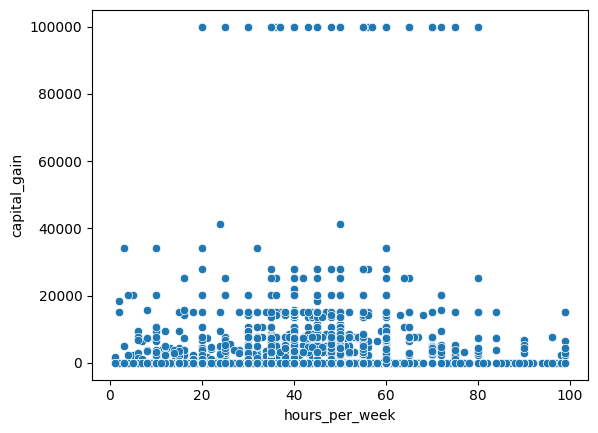

In [41]:
sns.scatterplot(y=data['capital_gain'],x=data['hours_per_week'])

<BarContainer object of 32537 artists>

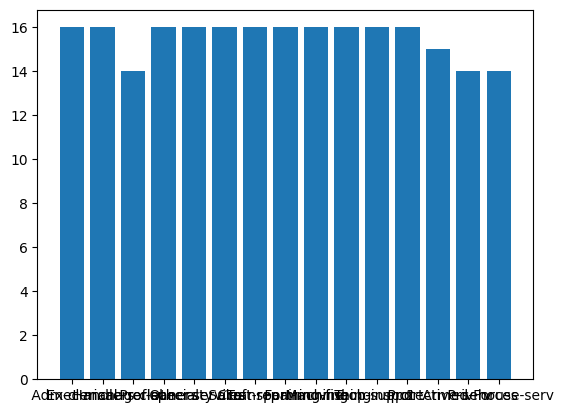

In [42]:
plt.bar(data['occupation'],data['education_num'])

In [ ]:
## Multivariate Analysis

In [32]:
col_cat

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [33]:
col_num

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

<Axes: xlabel='age', ylabel='hours_per_week'>

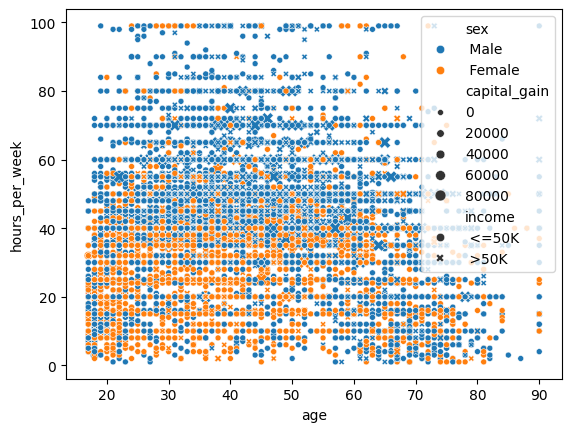

In [44]:
sns.scatterplot(x=data['age'],y=data['hours_per_week'],hue=data['sex'],style=data['income'],size=data['capital_gain'])

<Axes: xlabel='sex', ylabel='age'>

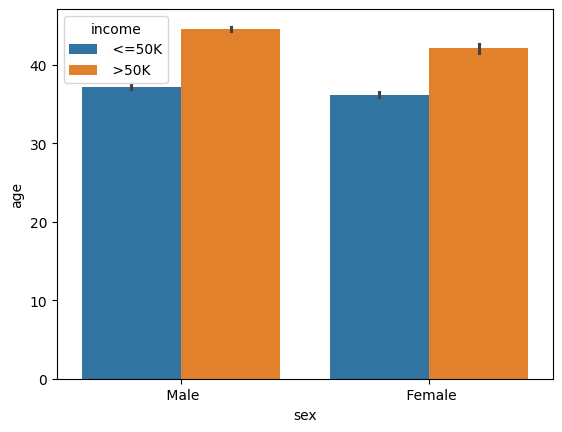

In [45]:
sns.barplot(x=data['sex'],y=data['age'],hue=data['income'])               # Average Age by gender

<Axes: xlabel='sex', ylabel='hours_per_week'>

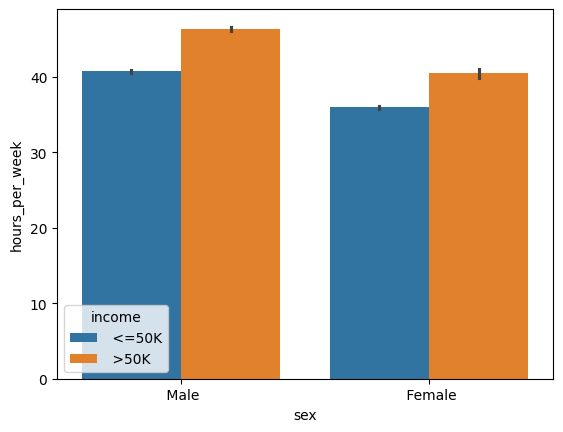

In [46]:
sns.barplot(x=data['sex'],y=data['hours_per_week'],hue=data['income'])

<Axes: xlabel='sex', ylabel='age'>

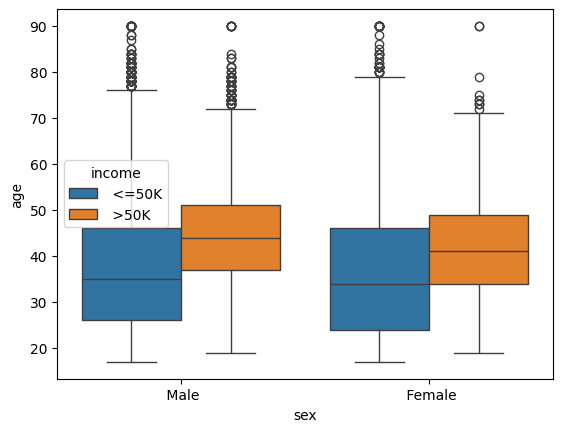

In [47]:
sns.boxplot(x=data['sex'],y=data['age'],hue=data['income'])

In [48]:
data['sex'].value_counts()

,count
sex,
Male,21775
Female,10762


<Axes: xlabel='income', ylabel='sex'>

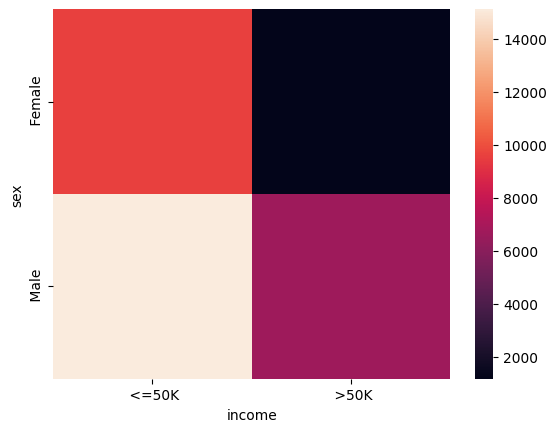

In [56]:
sns.heatmap(pd.crosstab(data['sex'],data['income']))

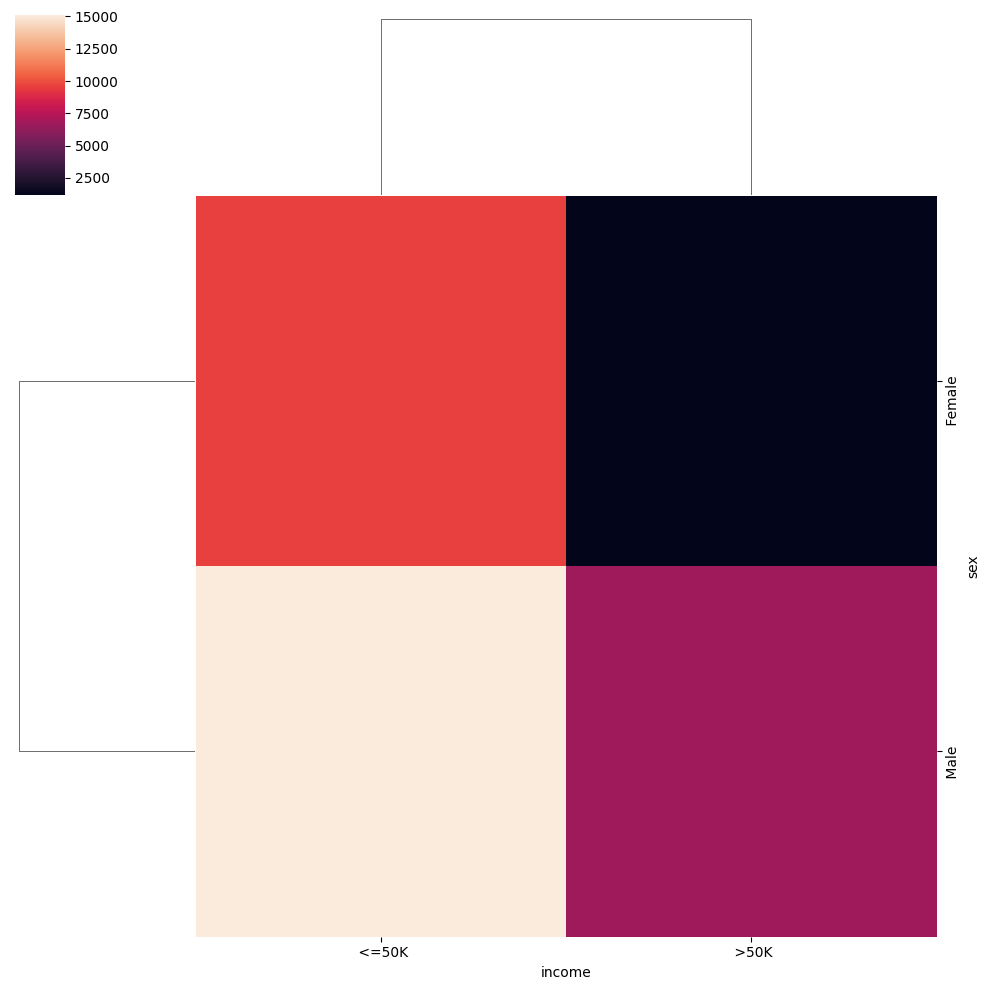

In [57]:
sns.clustermap(pd.crosstab(data['sex'],data['income']))

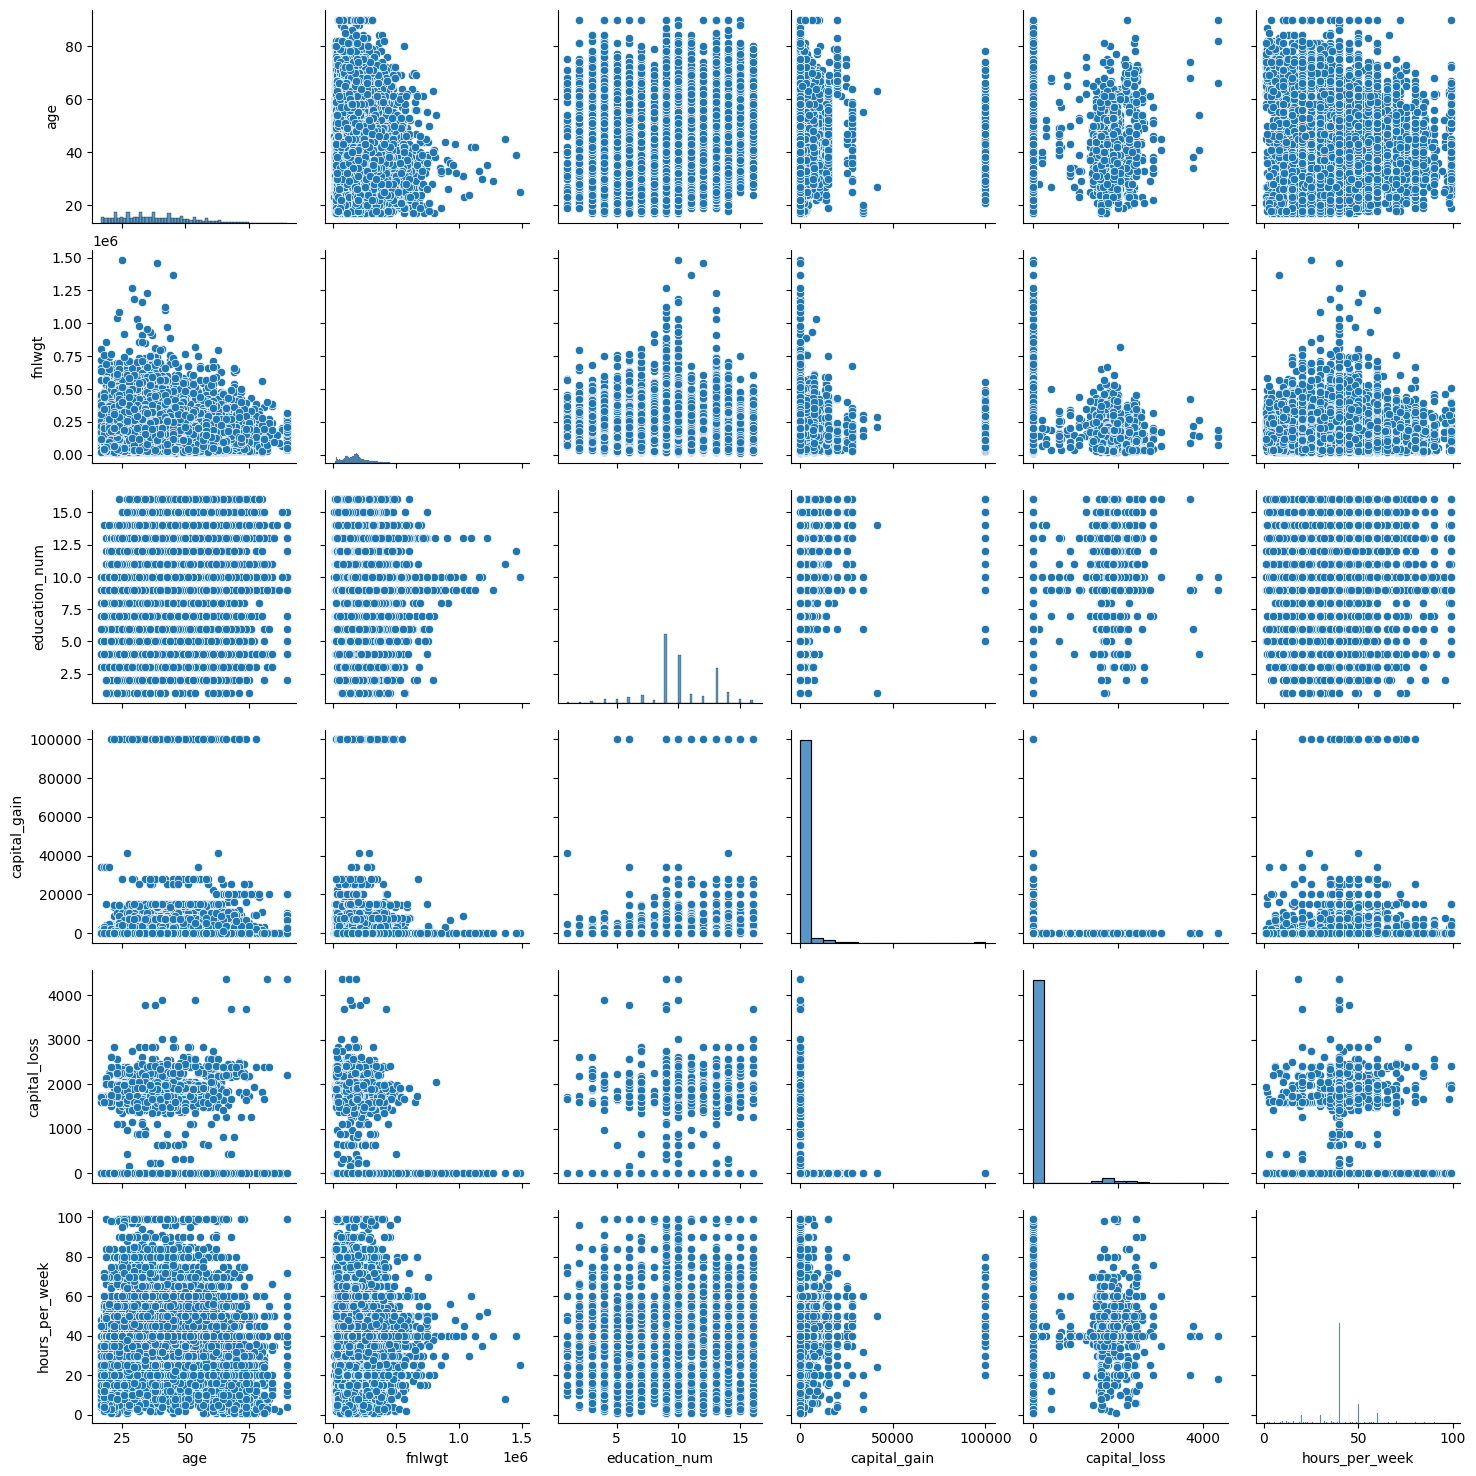

In [58]:
sns.pairplot(data)

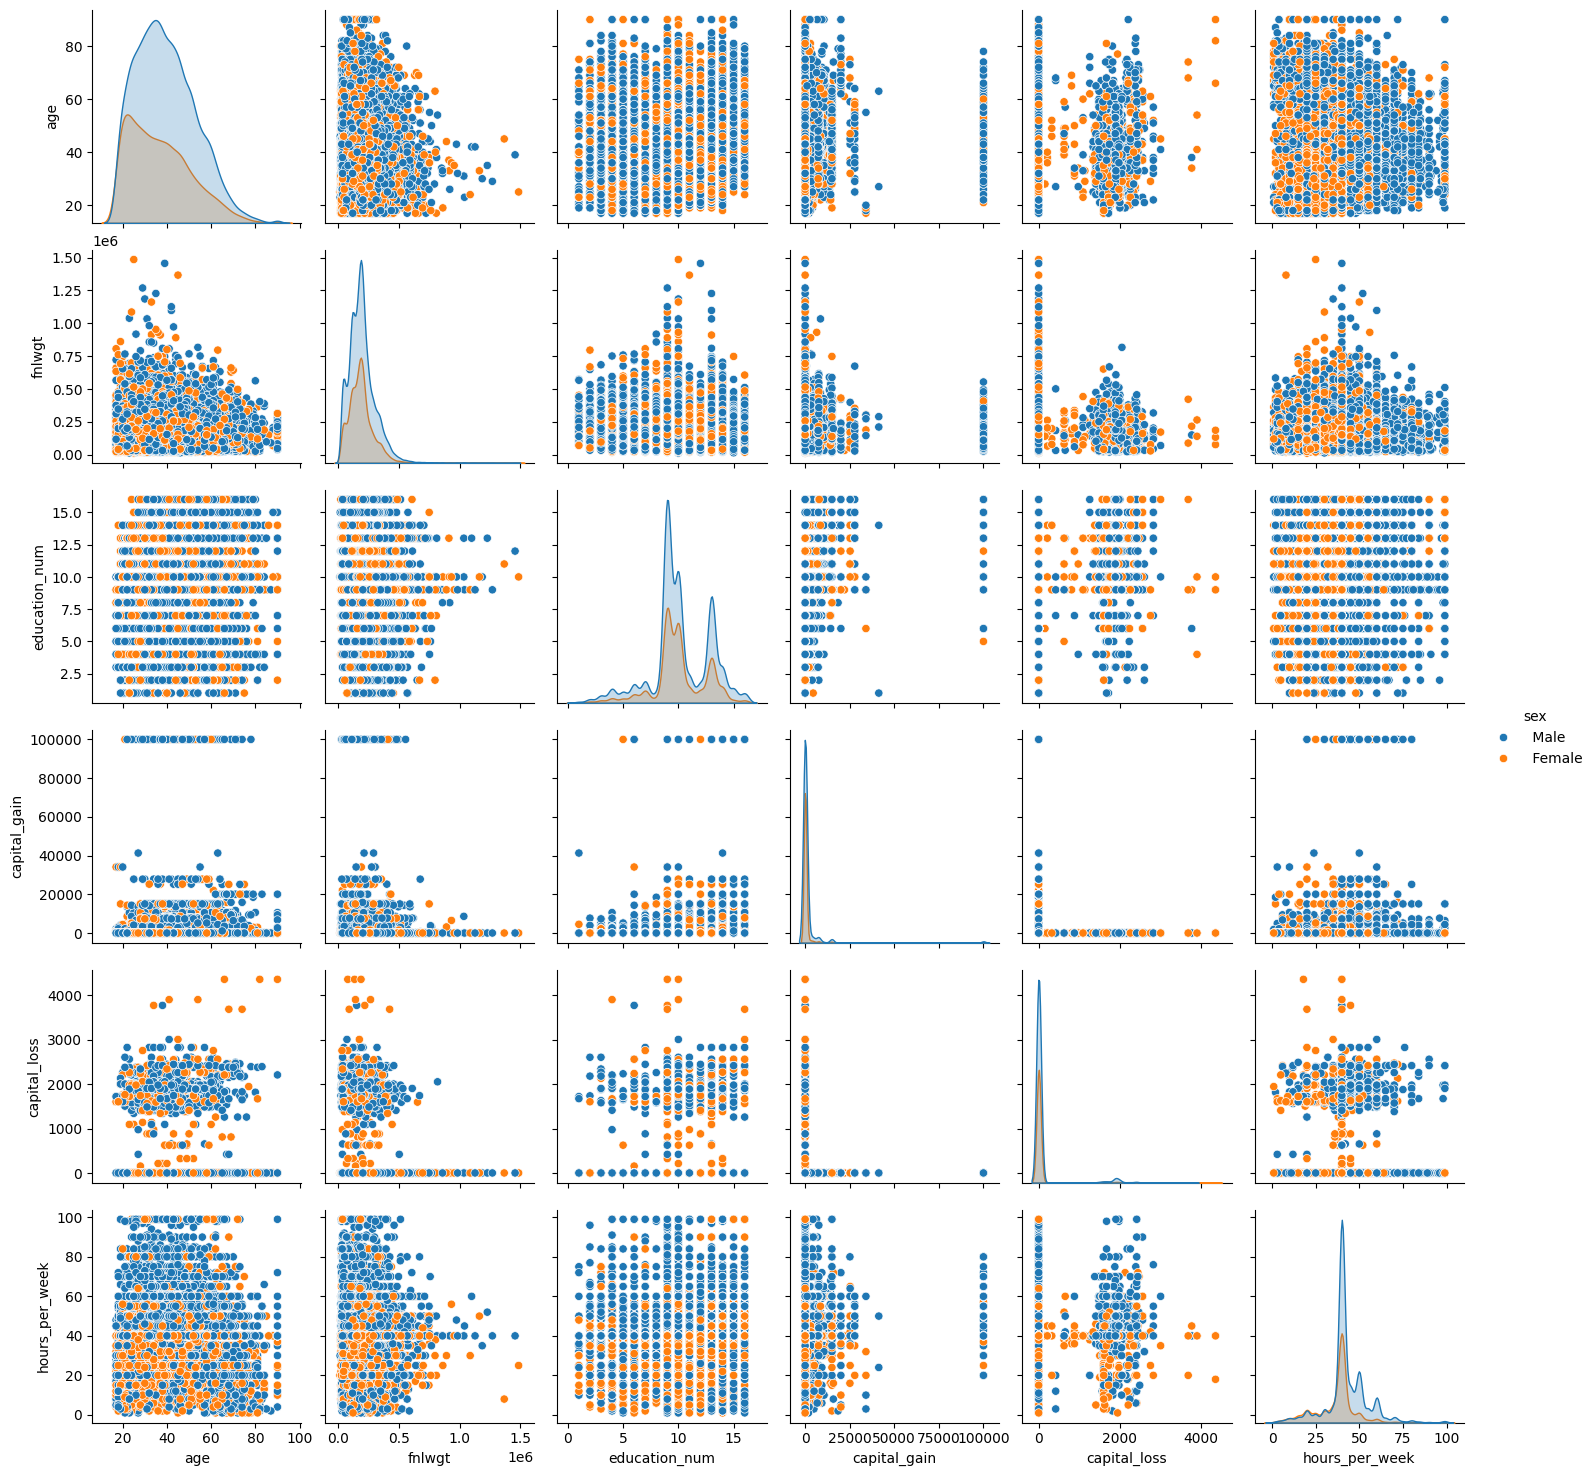

In [59]:
sns.pairplot(data,hue='sex')